In [ ]:
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("drive/MyDrive/bitcoin.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
x = []
for val in df['Open']:
  x.append(float(''.join(val.split(','))))
print(x)
df['Open']=x
df = df[::-1]

[27300.6, 27723.9, 26118.1, 26100.6, 26017.1, 26057.2, 26176.1, 26436.2, 26042.0, 26126.8, 26190.8, 26099.5, 26053.3, 26635.7, 28726.1, 29195.3, 29426.7, 29300.1, 29428.2, 29420.8, 29448.9, 29578.0, 29771.3, 29204.2, 29081.3, 29067.9, 29105.6, 29189.1, 29180.9, 29711.8, 29232.3, 29282.0, 29354.2, 29315.0, 29222.7, 29352.9, 29228.8, 29178.3, 30085.9, 29788.9, 29904.5, 29801.0, 29909.7, 29866.7, 30139.7, 30235.5, 30291.8, 30316.8, 31465.4, 30387.3, 30623.3, 30414.2, 30166.9, 30288.8, 30346.8, 29912.7, 30512.8, 30768.6, 31152.0, 30617.5, 30587.1, 30472.9, 30445.7, 30077.3, 30691.9, 30267.0, 30466.3, 30533.6, 30680.7, 29890.2, 29992.8, 28307.7, 26845.9, 26339.7, 26515.0, 26341.3, 25591.9, 25129.5, 25929.0, 25906.9, 25927.9, 25843.3, 26479.3, 26501.1, 26341.8, 27230.2, 25745.6, 27122.3, 27070.9, 27246.0, 26819.0, 27216.4, 27696.9, 27738.9, 28068.4, 26855.3, 26711.2, 26475.5, 26327.1, 27220.7, 26851.6, 26749.9, 27116.2, 26883.0, 26828.2, 27403.8, 27035.5, 27183.9, 26920.4, 26777.4, 26798.7, 

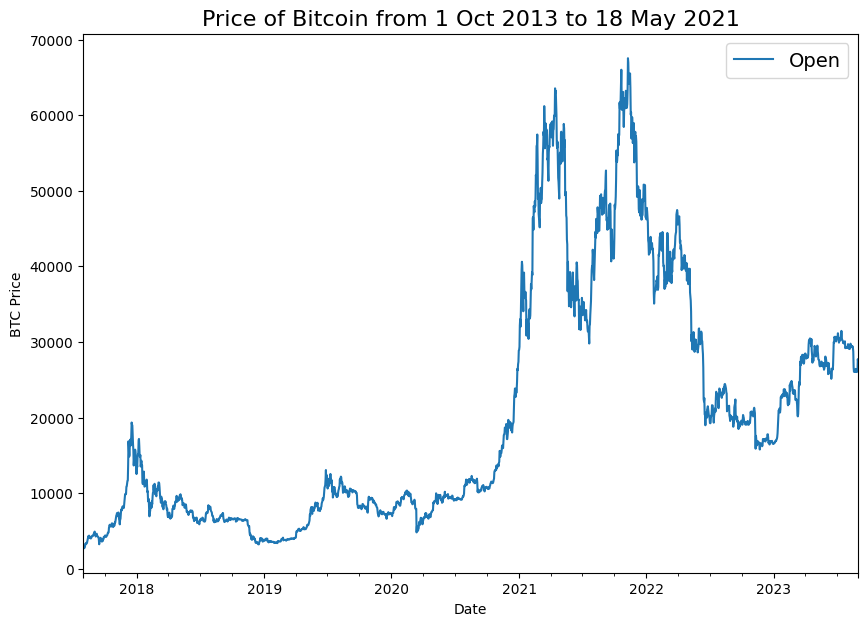

In [ ]:

import matplotlib.pyplot as plt
df.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
import csv
from datetime import datetime
d = pd.read_csv("drive/MyDrive/bitcoin.csv",
                 parse_dates=["Date"]) # parse the date column (tell pandas column 1 is a datetime)

d = d[::-1]
x = x[::-1]
prices = x
timesteps = list(d['Date'])

In [ ]:
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1778, 445, 1778, 445)

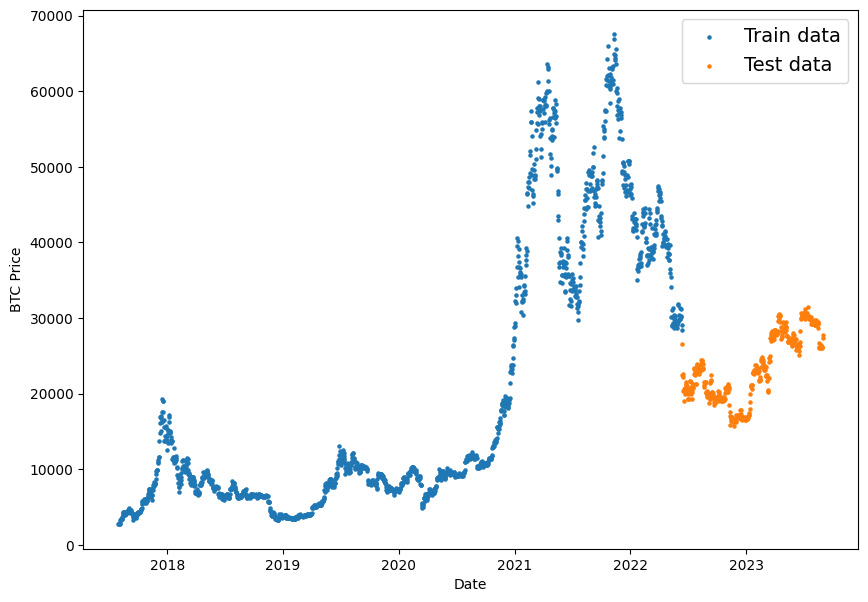

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

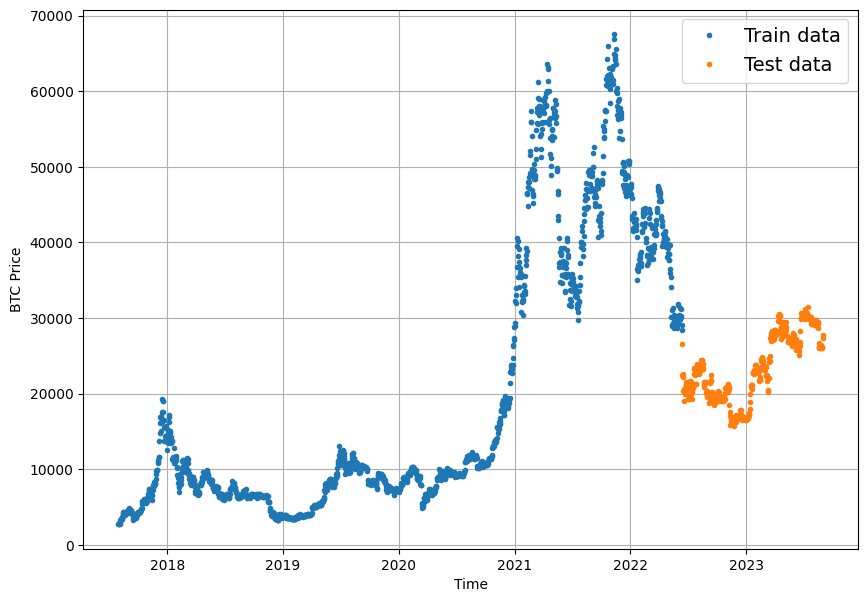

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

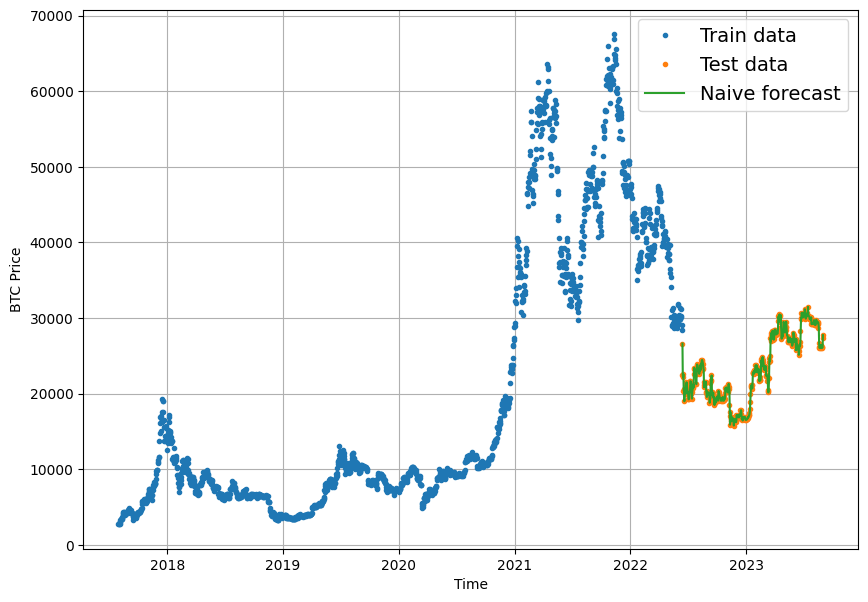

In [ ]:
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

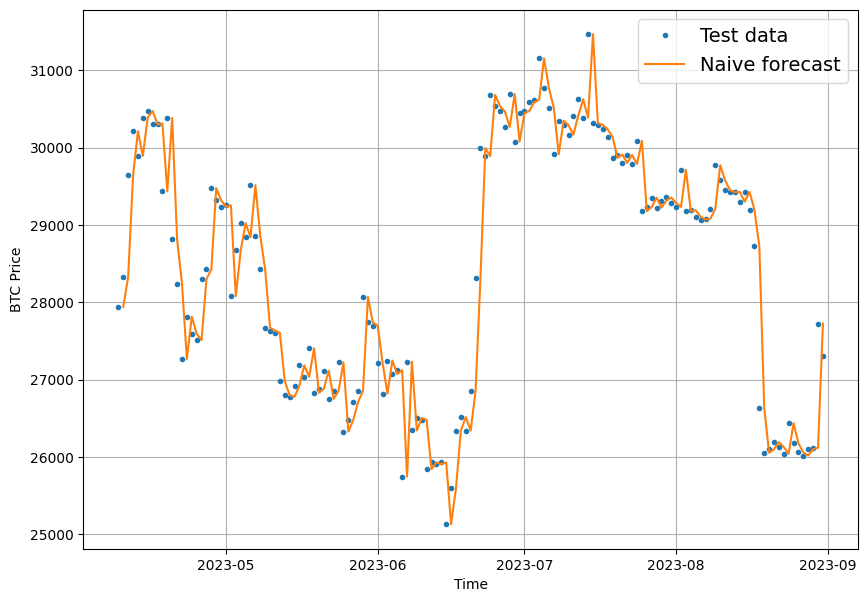

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [ ]:
import tensorflow as tf

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 412.16467,
 'mse': 408665.25,
 'rmse': 639.2693,
 'mape': 1.8089559,
 'mase': 1.0209403}

In [ ]:
tf.reduce_mean(y_test).numpy()

23358.92

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [ ]:
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]


# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
import numpy as np

In [ ]:
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(np.array(prices), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2216, 2216)

In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1772, 444, 1772, 444)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[2766.5, 2883.3, 2747. , 2720.5, 2810. , 2878.5, 3262.8],
        [2883.3, 2747. , 2720.5, 2810. , 2878.5, 3262.8, 3232. ],
        [2747. , 2720.5, 2810. , 2878.5, 3262.8, 3232. , 3401.9],
        [2720.5, 2810. , 2878.5, 3262.8, 3232. , 3401.9, 3429.4],
        [2810. , 2878.5, 3262.8, 3232. , 3401.9, 3429.4, 3348.8]]),
 array([[3232. ],
        [3401.9],
        [3429.4],
        [3348.8],
        [3425.7]]))

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=500,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name), tf.keras.callbacks.ReduceLROnPlateau(patience = 100)]) # create ModelCheckpoint callback to save best m

Epoch 1/500
56/56 [==============================] - 5s 18ms/step - loss: 8732.8945 - mae: 8732.8945 - val_loss: 1018.1399 - val_mae: 1018.1399 - lr: 0.0010
Epoch 2/500
56/56 [==============================] - 1s 10ms/step - loss: 1150.4238 - mae: 1150.4238 - val_loss: 925.9578 - val_mae: 925.9578 - lr: 0.0010
Epoch 3/500
56/56 [==============================] - 1s 10ms/step - loss: 1080.4633 - mae: 1080.4633 - val_loss: 786.3130 - val_mae: 786.3130 - lr: 0.0010
Epoch 4/500
56/56 [==============================] - 0s 4ms/step - loss: 1036.1747 - mae: 1036.1747 - val_loss: 802.8030 - val_mae: 802.8030 - lr: 0.0010
Epoch 5/500
56/56 [==============================] - 0s 4ms/step - loss: 993.0375 - mae: 993.0375 - val_loss: 881.8599 - val_mae: 881.8599 - lr: 0.0010
Epoch 6/500
56/56 [==============================] - 0s 4ms/step - loss: 898.1065 - mae: 898.1065 - val_loss: 938.1860 - val_mae: 938.1860 - lr: 0.0010
Epoch 7/500
56/56 [==============================] - 1s 10ms/step - loss: 8

In [ ]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

14/14 [==============================] - 0s 2ms/step - loss: 411.8015 - mae: 411.8015


[411.80145263671875, 411.80145263671875]

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

14/14 [==============================] - 0s 3ms/step


(444,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([26750.889, 22933.14 , 22199.559, 22408.238, 20546.734, 20551.07 ,
        19101.482, 20392.734, 20514.295, 20703.3  ], dtype=float32)>)

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 411.80142,
 'mse': 415815.97,
 'rmse': 644.83795,
 'mape': 1.8101324,
 'mase': 1.0200405}

In [ ]:
naive_results

{'mae': 412.16467,
 'mse': 408665.25,
 'rmse': 639.2693,
 'mape': 1.8089559,
 'mase': 1.0209403}

In [ ]:
X_train[-len(train_windows):][-1]

Timestamp('2022-06-12 00:00:00')

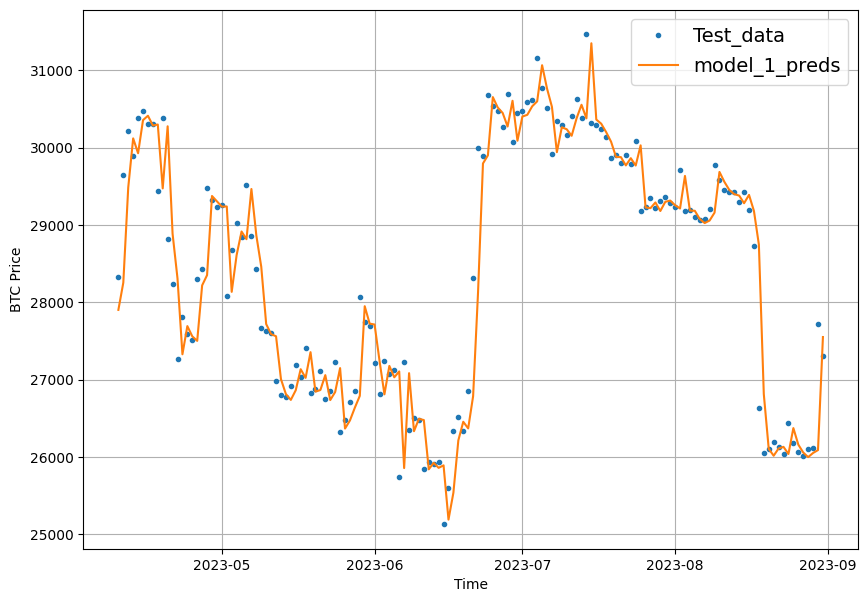

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [ ]:
len(X_test[-len(test_windows):])

444

In [ ]:
len(test_labels)

444

In [ ]:
len(model_1_preds)

444

In [ ]:
len(model_1_preds), len(y_test)

(444, 445)

In [ ]:
row1 = []
row2 = []
row3 = []
row4 = []
fields = []
for val in X_train:
  row1.append(str(val))
  row2.append('past')
  row4.append(0)
for val in y_train:
  row3.append(val)
for val in X_test[:-1]:
  row1.append(str(val))
  row2.append('future')
row4.append(0)
for val in y_test[:-1]:
  row3.append(val)
for val in model_1_preds:
  row4.append(round(float(val),1))
for i in range(len(row1)):
  fields.append([row1[i],row3[i], row4[i], row2[i] ])

In [ ]:
X_test

[Timestamp('2022-06-13 00:00:00'),
 Timestamp('2022-06-14 00:00:00'),
 Timestamp('2022-06-15 00:00:00'),
 Timestamp('2022-06-16 00:00:00'),
 Timestamp('2022-06-17 00:00:00'),
 Timestamp('2022-06-18 00:00:00'),
 Timestamp('2022-06-19 00:00:00'),
 Timestamp('2022-06-20 00:00:00'),
 Timestamp('2022-06-21 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-06-23 00:00:00'),
 Timestamp('2022-06-24 00:00:00'),
 Timestamp('2022-06-25 00:00:00'),
 Timestamp('2022-06-26 00:00:00'),
 Timestamp('2022-06-27 00:00:00'),
 Timestamp('2022-06-28 00:00:00'),
 Timestamp('2022-06-29 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-07-02 00:00:00'),
 Timestamp('2022-07-03 00:00:00'),
 Timestamp('2022-07-04 00:00:00'),
 Timestamp('2022-07-05 00:00:00'),
 Timestamp('2022-07-06 00:00:00'),
 Timestamp('2022-07-07 00:00:00'),
 Timestamp('2022-07-08 00:00:00'),
 Timestamp('2022-07-09 00:00:00'),
 Timestamp('2022-07-10 00:00:00'),
 Timestamp('2022-07-

In [ ]:
fields[-10:]

[['2023-08-21 00:00:00', 26190.8, 26015.15, 'future'],
 ['2023-08-22 00:00:00', 26126.8, 26109.13, 'future'],
 ['2023-08-23 00:00:00', 26042.0, 26129.7, 'future'],
 ['2023-08-24 00:00:00', 26436.2, 26037.58, 'future'],
 ['2023-08-25 00:00:00', 26176.1, 26372.38, 'future'],
 ['2023-08-26 00:00:00', 26057.2, 26158.99, 'future'],
 ['2023-08-27 00:00:00', 26017.1, 26057.11, 'future'],
 ['2023-08-28 00:00:00', 26100.6, 25997.35, 'future'],
 ['2023-08-29 00:00:00', 26118.1, 26050.85, 'future'],
 ['2023-08-30 00:00:00', 27723.9, 26088.09, 'future']]

In [ ]:
import csv
filename = "drive/MyDrive/bitcoin_forecast.csv"

# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)

    # writing the fields
    csvwriter.writerow(['date', 'price', 'pred', 'future/past'])

    # writing the data rows
    csvwriter.writerows(fields)

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(train_windows)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(train_labels)

test_features_dataset = tf.data.Dataset.from_tensor_slices(test_windows)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(test_labels)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1),create_model_checkpoint(model_name=f'mod {loss_function}{i}')])

      # Append fitted model to list of ensemble models
      ensemble_models.append(tf.keras.models.load_model(f'model_experiments/mod {loss_function}{i}'))

  return ensemble_models # return list of trained models

In [ ]:

ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0


KeyboardInterrupt: ignored

In [ ]:
import shutil
shutil.move('model_experiments', 'drive/MyDrive/model_experiments')

'drive/MyDrive/model_experiments'

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  max = 1000
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                      y_pred=tf.squeeze(preds))
    ensemble_preds.append(preds)
    if ensemble_results['mae']<max:
      max = ensemble_results['mae']
  print(max)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
import tensorflow as tf
ensemble_models = []
import os
for i in os.listdir('drive/MyDrive/model_experiments'):
  ensemble_models.append(tf.keras.models.load_model('drive/MyDrive/model_experiments'+'/'+i))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 9ms/step
294.63416


<tf.Tensor: shape=(16, 444), dtype=float32, numpy=
array([[6661.9775, 6698.0947, 6694.4536, ..., 2702.4583, 2711.5457,
        2860.058 ],
       [6652.178 , 6708.357 , 6715.1714, ..., 2661.7532, 2710.3577,
        2799.8088],
       [6685.326 , 6710.068 , 6685.6772, ..., 2726.0078, 2651.6018,
        2813.1025],
       ...,
       [6652.833 , 6691.338 , 6695.0854, ..., 2741.937 , 2713.2886,
        2847.0771],
       [6664.2666, 6700.7305, 6702.5884, ..., 2627.8406, 2682.111 ,
        2817.157 ],
       [6675.8267, 6702.933 , 6697.8823, ..., 2711.6663, 2726.5413,
        2877.5088]], dtype=float32)>

In [ ]:
ensemble_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 297.54886,
 'mse': 237071.52,
 'rmse': 486.8999,
 'mape': 3.4673662,
 'mase': 1.0143764}

In [ ]:
import os
for i in os.listdir('drive/MyDrive/model_experiments'):
  ensemble_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
  ensemble_results

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7
bitcoin_prices_windowed = df.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Open+{i+1}"] = bitcoin_prices_windowed["Open"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,Open,High,Low,Vol.,Change %,Open+1,Open+2,Open+3,Open+4,Open+5,Open+6,Open+7
Date,,,,,,,,,,,,,
2017-07-31,"2,883.3",2766.5,"2,916.3","2,723.1",91.12K,4.22%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,"2,747.0",2883.3,"2,946.0","2,659.6",123.17K,-4.73%,2766.5,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-02,"2,720.5",2747.0,"2,773.8","2,668.9",81.82K,-0.96%,2883.3,2766.5,NaN,NaN,NaN,NaN,NaN
2017-08-03,"2,810.0",2720.5,"2,822.9","2,717.6",68.10K,3.29%,2747.0,2883.3,2766.5,NaN,NaN,NaN,NaN
2017-08-04,"2,878.5",2810.0,"2,892.7","2,779.5",68.76K,2.44%,2720.5,2747.0,2883.3,2766.5,NaN,NaN,NaN
2017-08-05,"3,262.8",2878.5,"3,344.0","2,875.9",159.40K,13.35%,2810.0,2720.5,2747.0,2883.3,2766.5,NaN,NaN
2017-08-06,"3,232.0",3262.8,"3,295.1","3,166.5",60.66K,-0.94%,2878.5,2810.0,2720.5,2747.0,2883.3,2766.5,NaN
2017-08-07,"3,401.9",3232.0,"3,425.1","3,198.5",88.11K,5.26%,3262.8,2878.5,2810.0,2720.5,2747.0,2883.3,2766.5
2017-08-08,"3,429.4",3401.9,"3,494.9","3,357.1",106.94K,0.81%,3232.0,3262.8,2878.5,2810.0,2720.5,2747.0,2883.3


In [ ]:
X_all = bitcoin_prices_windowed.drop(["Price", "Open", "High", "Low", "Vol.", "Change %"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Open"].to_numpy()

In [ ]:
X_all

array([[ 3262.8,  2878.5,  2810. , ...,  2747. ,  2883.3,  2766.5],
       [ 3232. ,  3262.8,  2878.5, ...,  2720.5,  2747. ,  2883.3],
       [ 3401.9,  3232. ,  3262.8, ...,  2810. ,  2720.5,  2747. ],
       ...,
       [26100.6, 26017.1, 26057.2, ..., 26436.2, 26042. , 26126.8],
       [26118.1, 26100.6, 26017.1, ..., 26176.1, 26436.2, 26042. ],
       [27723.9, 26118.1, 26100.6, ..., 26057.2, 26176.1, 26436.2]])

In [ ]:
y_all

array([ 3232. ,  3401.9,  3429.4, ..., 26118.1, 27723.9, 27300.6])

In [ ]:
import tensorflow as tf
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [ ]:
INTO_FUTURE = 60 # since our Bitcoin data is daily, this is for 14 days

In [ ]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
import numpy as np
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [26176.1 26057.2 26017.1 26100.6 26118.1 27723.9 27300.6] -> Prediction: 25950.6171875

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [26057.2       26017.1       26100.6       26118.1       27723.9
 27300.6       25950.6171875] -> Prediction: 25988.998046875

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [26017.1        26100.6        26118.1        27723.9
 27300.6        25950.6171875  25988.99804688] -> Prediction: 26128.96875

1/1 [==============================] - 0s 16ms/step
Predicting on: 
 [26100.6        26118.1        27723.9        27300.6
 25950.6171875  25988.99804688 26128.96875   ] -> Prediction: 26316.53515625

1/1 [==============================] - 0s 22ms/step
Predicting on: 
 [26118.1        27723.9        27300.6        25950.6171875
 25988.99804688 26128.96875    26316.53515625] -> Prediction: 26799.89453125

1/1 [==============================] - 0s

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [ ]:
last_timestep = df.index[-1]
last_timestep

Timestamp('2023-08-31 00:00:00')

In [ ]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2023-09-01', '2023-09-02', '2023-09-03', '2023-09-04',
       '2023-09-05', '2023-09-06', '2023-09-07', '2023-09-08',
       '2023-09-09', '2023-09-10', '2023-09-11', '2023-09-12',
       '2023-09-13', '2023-09-14', '2023-09-15', '2023-09-16',
       '2023-09-17', '2023-09-18', '2023-09-19', '2023-09-20',
       '2023-09-21', '2023-09-22', '2023-09-23', '2023-09-24',
       '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28',
       '2023-09-29', '2023-09-30', '2023-10-01', '2023-10-02',
       '2023-10-03', '2023-10-04', '2023-10-05', '2023-10-06',
       '2023-10-07', '2023-10-08', '2023-10-09', '2023-10-10',
       '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-14',
       '2023-10-15', '2023-10-16', '2023-10-17', '2023-10-18',
       '2023-10-19', '2023-10-20', '2023-10-21', '2023-10-22',
       '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26',
       '2023-10-27', '2023-10-28', '2023-10-29', '2023-10-30'],
      dtype='datetime64[D]')

In [ ]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
next_time_steps, future_forecast

(array(['2023-08-31', '2023-09-01', '2023-09-02', '2023-09-03',
        '2023-09-04', '2023-09-05', '2023-09-06', '2023-09-07',
        '2023-09-08', '2023-09-09', '2023-09-10', '2023-09-11',
        '2023-09-12', '2023-09-13', '2023-09-14', '2023-09-15',
        '2023-09-16', '2023-09-17', '2023-09-18', '2023-09-19',
        '2023-09-20', '2023-09-21', '2023-09-22', '2023-09-23',
        '2023-09-24', '2023-09-25', '2023-09-26', '2023-09-27',
        '2023-09-28', '2023-09-29', '2023-09-30', '2023-10-01',
        '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05',
        '2023-10-06', '2023-10-07', '2023-10-08', '2023-10-09',
        '2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13',
        '2023-10-14', '2023-10-15', '2023-10-16', '2023-10-17',
        '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-21',
        '2023-10-22', '2023-10-23', '2023-10-24', '2023-10-25',
        '2023-10-26', '2023-10-27', '2023-10-28', '2023-10-29',
        '2023-10-30'], dtype='datetime64

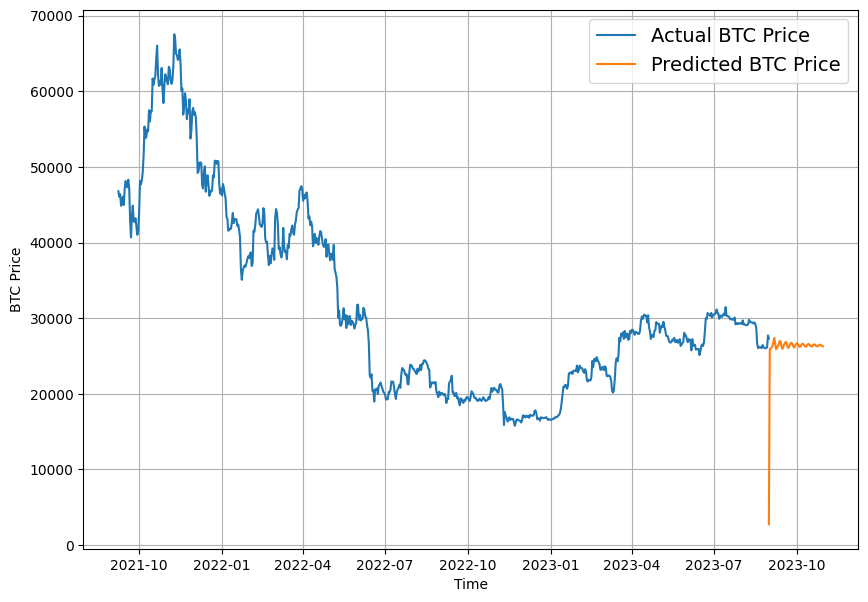

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plot_time_series(df.index, prices[::-1], start = 1500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")